# **CLASE 6 (SEGUNDA PARTE)**

Manipulación y estadística con Python:

*   Ejercicio 2 con base de datos creada


---
🧩 **EJEMPLO 2: EDA con base de datos creada desde cero**

---

In [3]:
#1. Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install squarify #correr esta línea primero en caso de que salga error al correr este primer chunk de código
import squarify  #Permite hacer mapas de árbol

In [6]:
#2. Creamos nuestros propios datos

#Se crea una tabla con ventas por región en 3 categorías (A,B,C)
datos = {
    "region": ["Norte", "Sur", "Este", "Oeste"],
    "categoria_A": [100, 80, 60, 40],
    "categoria_B": [50, 60, 70, 80],
    "categoria_C": [30, 40, 50, 60],
}
df = pd.DataFrame(datos)


#Se crea una tabla con ventas de dos productos a lo largo de 6 meses
meses = pd.date_range("2024-01-01", periods=6, freq="ME")
ventas_tiempo = pd.DataFrame({
    "mes": meses,
    "producto_A": [10, 15, 20, 18, 22, 25],
    "producto_B": [8, 9, 12, 15, 17, 20]
})

print('\n TABLA DE VENTAS POR REGIÓN Y CATEGORÍA')
print(df)
print('\n TABLA DE VENTAS POR PRODUCTO Y TIEMPO')
print(ventas_tiempo)


 TABLA DE VENTAS POR REGIÓN Y CATEGORÍA
  region  categoria_A  categoria_B  categoria_C
0  Norte          100           50           30
1    Sur           80           60           40
2   Este           60           70           50
3  Oeste           40           80           60

 TABLA DE VENTAS POR PRODUCTO Y TIEMPO
         mes  producto_A  producto_B
0 2024-01-31          10           8
1 2024-02-29          15           9
2 2024-03-31          20          12
3 2024-04-30          18          15
4 2024-05-31          22          17
5 2024-06-30          25          20


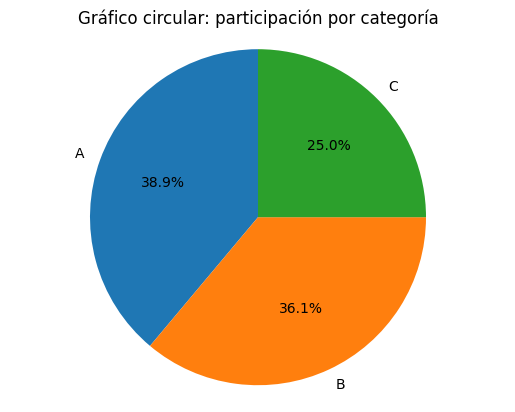

In [14]:
#3. Creamos nuestras visualizaciones

# Definimos el título
plt.title("Gráfico circular: participación por categoría")

# Creamos un diccionario nuevo sumando los valores de cada columna del DataFrame original
# Usamos .sum() porque el gráfico de pastel necesita el 'total' acumulado de cada categoría
totales_categoria = {
    "A": df["categoria_A"].sum(),
    "B": df["categoria_B"].sum(),
    "C": df["categoria_C"].sum()
}
plt.pie(totales_categoria.values(),    # Extrae los totales calculados (280, 260, 180)
        labels=totales_categoria.keys(), # Extrae los nombres "A", "B", "C"
        autopct="%1.1f%%",             # Formatea el porcentaje (ej. 38.9%)
        startangle=90)                 # Estética: comienza el primer sector arriba

plt.axis("equal") # Asegura que el círculo no se vea "aplastado"
plt.show()


## **📊 Análisis:**

- **Dominio de la Categoría A:** Tiene la porción más grande del pastel (38.9%) sólo ligeramente encima de la categoría B. Es el "producto estrella" o el motor principal de ventas.

- **Equilibrio entre A y B:** La Categoría B (36.1%) está muy cerca de la A. Esto indica que el negocio no depende de un solo tipo de producto, sino que tiene dos pilares fuertes de ingreso.

- **Oportunidad en la Categoría C:** La Categoría C es la más pequeña (aproximadamente el 25% del total).

---
**Conclusión:**

Se podría concluir que la Categoría C es un producto de nicho o que quizás necesita una nueva estrategia de marketing para crecer al nivel de las otras dos.

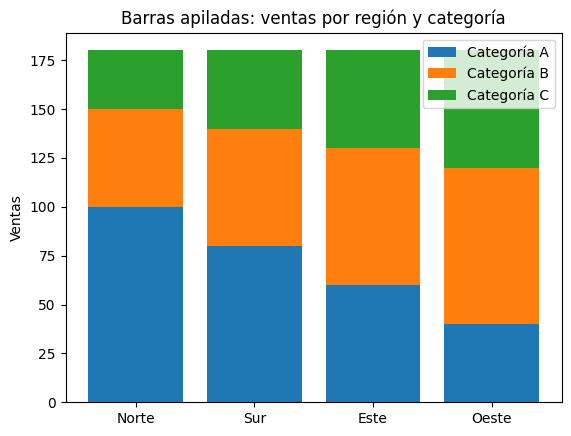

In [16]:
plt.title("Barras apiladas: ventas por región y categoría")

# Dibujamos la base (Categoría A): Esta es la barra que toca el suelo (el eje X)
plt.bar(df["region"],
        df["categoria_A"],
        label="Categoría A")

# Apilamos la Categoría B
#   🪄TIP🪄: El uso de bottom es lo que transforma una gráfica de barras normal en una apilada.
#   Es como construir una torre de bloques: siempre tienes que decirle al nuevo bloque sobre qué otros bloques debe sostenerse.
plt.bar(df["region"],
        df["categoria_B"],
        bottom=df["categoria_A"], #Empiza a dibujar justo donde terminan los valores de la categoría A
        label="Categoría B")

# Apilamos la Categoría C
plt.bar(df["region"],
        df["categoria_C"],
        bottom=df["categoria_A"] + df["categoria_B"], #Aquí el 'bottom' es la suma de A y B. Así la barra C queda en la cima.
        label="Categoría C")

plt.ylabel("Ventas") # Etiqueta del eje vertical
plt.legend()         # Muestra el cuadro con los nombres de las categorías y sus colores

plt.show()

## **📊 Análisis**

Todas las regiones suman el mismo volumen total de ventas, sin embargo cada una se caracteriza por vender un volumen distinto de categorías:

- **Norte:** Es el "reino" de la Categoría A. Casi todo su volumen viene de ahí.

- **Sur:** Su mayor producto también es la Categoría A. Sin embargo, en menor proporción comparado a la región Norte.

- **Este:** Su mayor producto es la categoría B. Sin embargo, es el mercado más equilibrado.

- **Oeste:** Su mayor producto es la categoría B.

---
**Conclusión:**

 Si se quisiera, por ejemplo, lanzar una campaña para la Categoría C, la región Este y Oeste son los mejores candidatos, ya que ahí el producto ya tiene tracción. En el Norte, la Categoría C es casi inexistente, lo que representa un reto o una oportunidad de expansión.

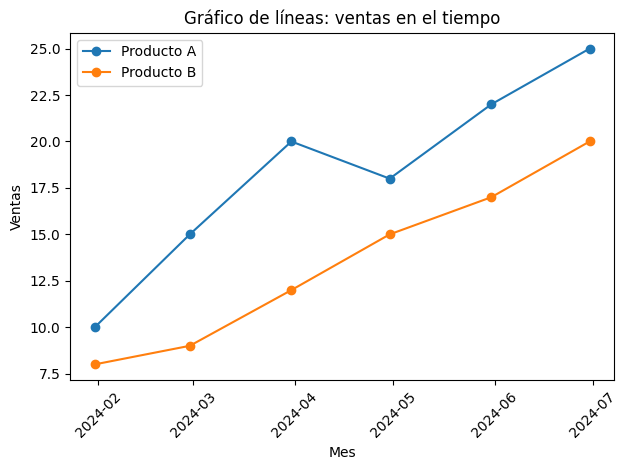

In [17]:
# Graficamos el Producto A
plt.plot(ventas_tiempo["mes"],           # Eje X: Las fechas (enero a junio)
         ventas_tiempo["producto_A"],    # Eje Y: Valores de venta
         marker="o",                     # Agrega puntos en cada mes para marcar el dato exacto
         label="Producto A")             # Etiqueta para la leyenda

# Graficamos el Producto B
plt.plot(ventas_tiempo["mes"],
         ventas_tiempo["producto_B"],
         marker="o",
         label="Producto B")

# Configuración de etiquetas y diseño
plt.title("Gráfico de líneas: ventas en el tiempo")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.legend()                             # Muestra el cuadro identificador de cada línea

# Ajustes de legibilidad
plt.xticks(rotation=45)                  # Rota las fechas 45 grados para que no se amontonen
plt.tight_layout()                       # Ajusta los márgenes automáticamente para que no se corte nada

plt.show()

## **📊 Análisis**

El desempeño de los productos muestraun crecimiento neto positivo desde enero hasta junio, lo que indica una expansión del mercado.

- **Producto A:** Es el líder en volumen, aunque presenta volatilidad con una ligera caída en el mes de abril antes de retomar su tendencia.

- **Producto B:** Muestra el crecimiento más estable y predecible. Su ascenso es constante mes a mes, sin presentar retrocesos en su trayectoria.

---
**Conclusión:**

Aunque el Producto A mantiene la delantera, el ritmo constante del Producto B sugiere que la distancia entre ambos se está estabilizando. Además, el  negocio tiene una base sólida con el Producto B como ancla de estabilidad, mientras que el Producto A aporta el mayor volumen aunque con mayor riesgo de fluctuación.

Para la planificación del segundo semestre, sería ideal investigar qué causó la baja de abril en el Producto A para evitar que se repita.

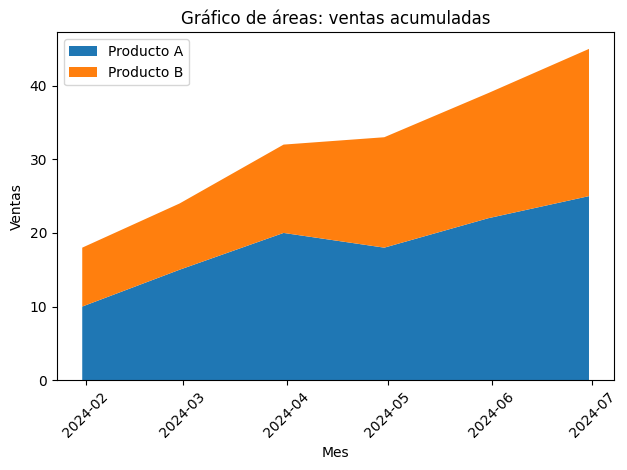

In [18]:
# Creamos el gráfico de áreas apiladas
# A diferencia de .plot(), aquí el orden de las variables define qué área queda abajo
plt.stackplot(
    ventas_tiempo["mes"],
    ventas_tiempo["producto_A"], # Base del gráfico
    ventas_tiempo["producto_B"], # Se apila sobre el Producto A
    labels=["Producto A", "Producto B"]
)

# Configuración estética
plt.title("Gráfico de áreas: ventas acumuladas")
plt.xlabel("Mes")
plt.ylabel("Ventas")

# Ubicamos la leyenda en la esquina superior izquierda para que no tape las áreas
plt.legend(loc="upper left")

# Ajustes finales de legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## **📊 Análisis**

Este gráfico nos permite visualizar el "tamaño" total de la operación comercial y cómo cada producto contribuye a ese volumen acumulado mes con mes.

- **Crecimiento total:** La mancha de color total se ensancha significativamente hacia junio, lo que visualiza de forma muy clara el crecimiento de los ingresos totales de la empresa.

- **Producto A:** Es el producto estrella con mayores ventas acumuladas.

- **Producto B:** Es el producto que está en crecimiento y su aportación al total de ventas es cada vez más importante.

En conjunto, ambos productos para el mes de junio alcanzaron su punto máximo de ventas combinadas (45 unidades aproximadamente), duplicando casi el volumen inicial de enero.

---
**Conclusión:**

El gráfico de áreas demuestra que el negocio tiene un crecimiento positivo. Mientras que el Producto A es el que aporta el volumen principal, el Producto B está actuando como un motor de expansión constante.

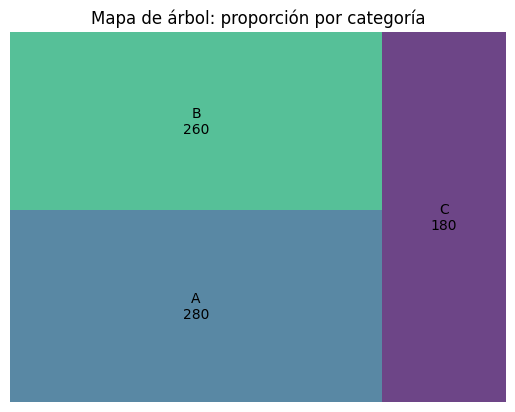

In [21]:
# Preparamos los datos en formato de lista
sizes = list(totales_categoria.values())

# Creamos etiquetas dinámicas que muestran el nombre y el valor exacto
labels = [f"{cat}\n{val}" for cat, val in totales_categoria.items()] #Pone el nombre arriba y el número abajo para que se vea ordenado

# Usamos la librería squarify para dibujar los rectángulos
squarify.plot(sizes=sizes, label=labels, alpha=0.8)  #sizes: tamaño de los cuadros | label: texto interno | alpha: transparencia (0.8)

# Estética
plt.axis("off") #En un Treemap no necesitamos los ejes (X e Y)
plt.title("Mapa de árbol: proporción por categoría") #Título

plt.show()

## **📊 Análisis**

El mapa de árbol permite comparar visualmente la magnitud de las ventas mediante áreas rectangulares, facilitando la jerarquización de las categorías:

- **Categoría A (280):** Es la principal fuente de volumen de la empresa.

- **Categoría B (260):** Es el segundo producto más fuerte de la empresa.

- **Categoría C (180):** Aunque es el producto de menor volumen , sigue teniendo una presencia importante que ocupa casi una cuarta parte del espacio total.

---
**Conclusión:**

El negocio está fuertemente impulsado por las categorías A y B, las cuales juntas dominan casi el 75% del área total de ventas, dejando a la Categoría C como un segmento complementario.

**🪄TIP:**
El Treemap es la herramienta ideal para presentar informes a directivos, ya que comunica el orden de importancia de forma instantánea.